In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:


# Load merged dataset
file_path = r"N:\DATASET\cic-2017\merged_output_generatedlabledflow.csv"
df = pd.read_csv(file_path, encoding='utf-8', low_memory=False)

# Treat inf and -inf as NA
pd.options.mode.use_inf_as_na = True

# Show all columns with missing values
print("Kolumny zawierające wartości NA:")
na_columns = df.loc[:, df.isnull().any()].isnull().sum()
print(na_columns)

# Example: Expected culprits from your inspection
suspect_columns = ['Flow Bytes/s', ' Flow Packets/s']  # extra space likely

# Strip whitespace from column names (very important!)
df.columns = df.columns.str.strip()

# Now recheck the cleaned column names and missing values
print("\nPo oczyszczeniu nazw kolumn:")
na_columns_cleaned = df.loc[:, df.isnull().any()].isnull().sum()
print(na_columns_cleaned)

# Replace inf/-inf with NaN, drop rows with any NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Optional: Reset index
df.reset_index(drop=True, inplace=True)

# Check datatypes
print("\nTypy danych po oczyszczeniu:")
print(df.dtypes.value_counts())

# Save back to the original file (you can change path if needed)
df.to_csv(file_path, index=False, encoding='utf-8')
print("\nCzyszczenie zakończone. Dane zapisane z powrotem do pliku.")


C:\Users\nishant lap\AppData\Local\Temp\ipykernel_440\1079914631.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


Kolumny zawierające wartości NA:
Flow Bytes/s       2732
 Flow Packets/s    2732
dtype: int64

Po oczyszczeniu nazw kolumn:
Flow Bytes/s      2732
Flow Packets/s    2732
dtype: int64

Typy danych po oczyszczeniu:
float64    45
int64      35
object      5
Name: count, dtype: int64

Czyszczenie zakończone. Dane zapisane z powrotem do pliku.


In [4]:
import pandas as pd
import numpy as np

# Load merged dataset
merged_file_path = r"N:\DATASET\cic-2017\merged_output_generatedlabledflow.csv"
data = pd.read_csv(merged_file_path, encoding='utf-8', low_memory=False)

# Treat inf and -inf as NA
pd.options.mode.use_inf_as_na = True

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Show columns with missing values before cleaning
print("Columns containing NA values before cleaning:")
missing_value_columns = data.loc[:, data.isnull().any()].isnull().sum()
print(missing_value_columns)

# Replace inf/-inf with NaN, drop rows with any NaNs
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

# Show columns with missing values after cleaning
print("\nColumns containing NA values after cleaning:")
missing_value_columns_after = data.loc[:, data.isnull().any()].isnull().sum()
print(missing_value_columns_after)

# Print the shape of the cleaned dataset
print("\nShape of the merged dataset after removing NA rows: {} rows and {} columns".format(data.shape[0], data.shape[1]))

# Check datatypes
print("\nData types after cleaning:")
print(data.dtypes.value_counts())

# Save cleaned data back to the original file
data.to_csv(merged_file_path, index=False, encoding='utf-8')
print("\nCleaning complete. Data saved back to file.")

C:\Users\nishant lap\AppData\Local\Temp\ipykernel_440\3233792441.py:9: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


Columns containing NA values before cleaning:
Series([], dtype: float64)

Columns containing NA values after cleaning:
Series([], dtype: float64)

Shape of the merged dataset after removing NA rows: 2657645 rows and 85 columns

Data types after cleaning:
float64    45
int64      35
object      5
Name: count, dtype: int64

Cleaning complete. Data saved back to file.


Columns with all zero values: ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
Shape after removing all-zero columns: (2657645, 77)
Unique labels before cleaning:
['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration' 'FTP-Patator'
 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed']


C:\Users\nishant lap\AppData\Local\Temp\ipykernel_440\310636263.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Label"].replace(label_replacements, inplace=True)


Unique labels after cleaning:
['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration' 'FTP-Patator'
 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed']
Shape after adding traffic_type column: (2657645, 78)


C:\Users\nishant lap\AppData\Local\Temp\ipykernel_440\310636263.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="traffic_type", data=data, palette=["g", "r"])


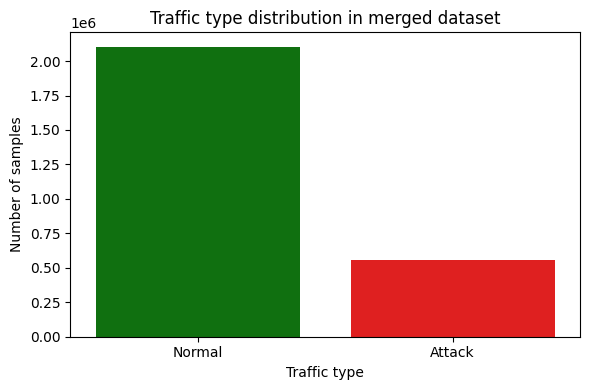

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged dataset
merged_file_path = r"N:\DATASET\cic-2017\merged_output_generatedlabledflow.csv"
data = pd.read_csv(merged_file_path, encoding='utf-8', low_memory=False)

# Remove columns containing only zeros
describe_info = data.describe()
all_zero_columns = describe_info.columns[(describe_info.loc["mean"] == 0) & (describe_info.loc["std"] == 0)]
print(f"Columns with all zero values: {list(all_zero_columns)}")
data.drop(columns=all_zero_columns, inplace=True)
print(f"Shape after removing all-zero columns: {data.shape}")

# Clean label names: replace non-printable characters and strip whitespace
print("Unique labels before cleaning:")
print(data["Label"].unique())

label_replacements = {
    "Web Attack � XSS": "XSS",
    "Web Attack � Sql Injection": "Sql Injection",
    "Web Attack � Brute Force": "Brute Force"
}
data["Label"].replace(label_replacements, inplace=True)
data["Label"] = data["Label"].str.strip()

print("Unique labels after cleaning:")
print(data["Label"].unique())

# Add a new column to distinguish between Normal and Attack traffic
data["traffic_type"] = data["Label"].map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack")
print(f"Shape after adding traffic_type column: {data.shape}")

# Plot distribution of Normal vs Attack traffic
plt.figure(figsize=(6, 4))
sns.countplot(x="traffic_type", data=data, palette=["g", "r"])
plt.title("Traffic type distribution in merged dataset")
plt.xlabel("Traffic type")
plt.ylabel("Number of samples")
plt.tight_layout()
plt.savefig("distribution_traffic_type.png", dpi=200, format='png')
plt.show()

In [6]:
data.to_csv(merged_file_path, index=False, encoding='utf-8')

In [7]:
import pandas as pd
import numpy as np

# Load merged dataset
merged_file_path = r"N:\DATASET\cic-2017\merged_output_generatedlabledflow.csv"
data = pd.read_csv(merged_file_path, encoding='utf-8', low_memory=False)

# Identify columns that contain only zeros
describe_info = data.describe()
all_zero_columns = describe_info.columns[(describe_info.loc["mean"] == 0) & (describe_info.loc["std"] == 0)]

print(f"Columns with all zero values: {list(all_zero_columns)}")

# Remove all-zero columns from the DataFrame
data.drop(columns=all_zero_columns, inplace=True)

print(f"Shape after removing all-zero columns: {data.shape}")

# Save the cleaned DataFrame back to the original file
data.to_csv(merged_file_path, index=False, encoding='utf-8')
print("Cleaned dataset saved to original file.")

Columns with all zero values: []
Shape after removing all-zero columns: (2657645, 78)
Cleaned dataset saved to original file.


#### traffic understanding

In [9]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

# Load merged dataset
merged_file_path = r"N:\DATASET\cic-2017\merged_output_generatedlabledflow.csv"
data = pd.read_csv(merged_file_path, encoding='utf-8', low_memory=False)

# Check current distribution of traffic types
print("Original traffic type distribution:")
print(data["traffic_type"].value_counts())

# Prepare for downsampling: separate features and target
traffic_type = data["traffic_type"]
data_features = data.drop(["traffic_type"], axis=1)

# Downsample the majority class to balance the dataset
rus = RandomUnderSampler(random_state=10, sampling_strategy=0.85)  # 0.85 means minority/majority ratio
data_resampled, traffic_type_resampled = rus.fit_resample(data_features, traffic_type)

# Re-attach the traffic_type column to the resampled data
data_balanced = pd.DataFrame(data_resampled, columns=data_features.columns)
data_balanced["traffic_type"] = traffic_type_resampled

# Check the shape and new distribution
print("Shape after downsampling:", data_balanced.shape)
print("Traffic type distribution after downsampling:")
print(data_balanced["traffic_type"].value_counts())

# (Optional) Save the balanced dataset to a new file or overwrite the original
# data_balanced.to_csv(merged_file_path, index=False, encoding='utf-8')

Original traffic type distribution:
traffic_type
Normal    2103269
Attack     554376
Name: count, dtype: int64
Shape after downsampling: (1206583, 78)
Traffic type distribution after downsampling:
traffic_type
Normal    652207
Attack    554376
Name: count, dtype: int64


C:\Users\nishant lap\AppData\Local\Temp\ipykernel_440\1261860529.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


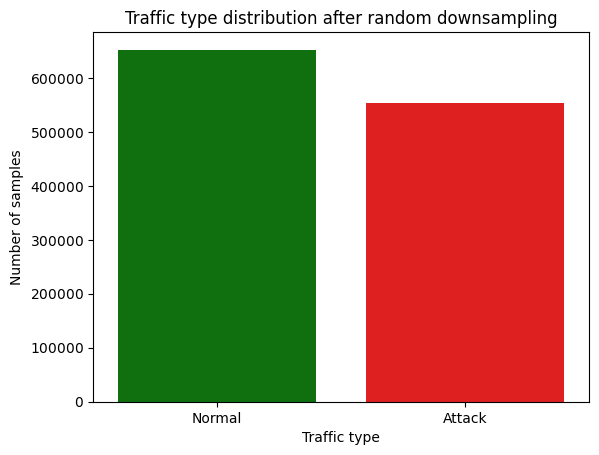

In [10]:


plt.ticklabel_format(axis='y', useMathText=True, useOffset=False)  # Use scientific notation for y-axis if needed

# Plot the distribution of traffic types after downsampling
sns.countplot(
    x="traffic_type",
    data=data_balanced,
    order=["Normal", "Attack"],   # Use your actual label values
    palette=["g", "r"]
)

plt.title("Traffic type distribution after random downsampling")
plt.xlabel("Traffic type")
plt.ylabel("Number of samples")
plt.savefig("distribution2.png", dpi=200, format='png')
plt.show()

##### CALCULATING FEATURES' IMPORTANCE

In [11]:
# Prepare labels for classification
labels = data_balanced["Label"]

# Prepare features by removing the last two columns (assumed to be categorical: "Label" and "traffic_type")
features = data_balanced.iloc[:, :-2]

# Check the info of the features DataFrame
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1206583 entries, 18871 to 2434404
Data columns (total 76 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Flow ID                      1206583 non-null  object 
 1   Source IP                    1206583 non-null  object 
 2   Source Port                  1206583 non-null  int64  
 3   Destination IP               1206583 non-null  object 
 4   Destination Port             1206583 non-null  int64  
 5   Protocol                     1206583 non-null  int64  
 6   Timestamp                    1206583 non-null  object 
 7   Flow Duration                1206583 non-null  int64  
 8   Total Fwd Packets            1206583 non-null  int64  
 9   Total Backward Packets       1206583 non-null  int64  
 10  Total Length of Fwd Packets  1206583 non-null  float64
 11  Total Length of Bwd Packets  1206583 non-null  float64
 12  Fwd Packet Length Max        1206583 non-nu

In [1]:
from sklearn.ensemble import RandomForestClassifier

# Ensure only numeric columns are used for features
numeric_features = features.select_dtypes(include=[np.number])

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=10, n_jobs=-1)  # n_jobs=-1 uses all available CPU cores

# Fit the Random Forest Classifier on the numeric features
rfc.fit(numeric_features, labels)


KeyboardInterrupt



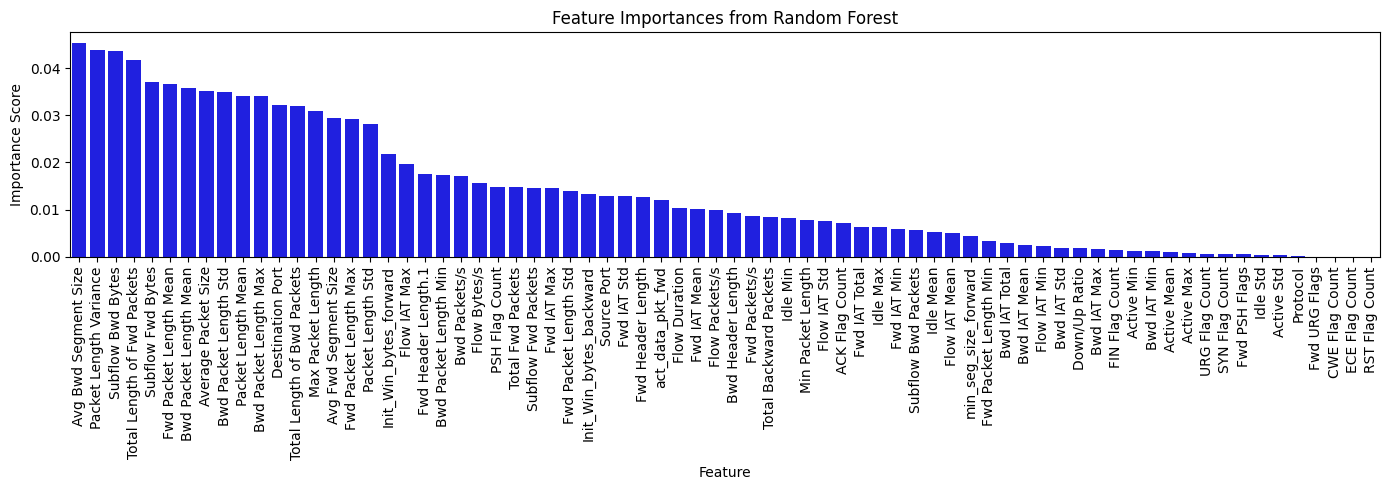

In [14]:

# Extract feature importances from the trained Random Forest
importance_scores = np.round(rfc.feature_importances_, 5)
importances = pd.DataFrame({
    'feature': numeric_features.columns,
    'importance': importance_scores
})

# Sort features by importance (descending)
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# Plot feature importances
plt.figure(figsize=(14, 5))
sns.barplot(x=importances.index, y="importance", data=importances, color="b")
plt.xticks(rotation="vertical")
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.savefig("importances.png", dpi=200, format='png', bbox_inches="tight", pad_inches=0.2)
plt.show()

In [2]:
# Set importance threshold
threshold = 0.001  # importance threshold

# Find features below the threshold
features_below_threshold = importances.loc[importances["importance"] < threshold]
print("There are {} features to delete, as they are below the chosen threshold.".format(features_below_threshold.shape[0]))
print("These features are the following:")
features_to_delete = [feat for feat in features_below_threshold.index]
print("\n".join(features_to_delete))

# Remove these not important features from your main DataFrame
data_balanced.drop(columns=features_to_delete, inplace=True)

NameError: name 'importances' is not defined

In [18]:
# Remove only those features that exist in the DataFrame
existing_features_to_delete = [col for col in features_to_delete if col in data_balanced.columns]
data_balanced.drop(columns=existing_features_to_delete, inplace=True)

# Save the remaining (processed) DataFrame back to the main dataset CSV
data_balanced.to_csv(merged_file_path, index=False, encoding='utf-8')
print(f"Processed dataset saved to: {merged_file_path}")

Processed dataset saved to: N:\DATASET\cic-2017\merged_output_generatedlabledflow.csv


In [21]:
# Display the DataFrame to check if it is still valid
data_balanced

# Or, to check its shape and info:
print(data_balanced.shape)
data_balanced.info()

(1206583, 66)
<class 'pandas.core.frame.DataFrame'>
Index: 1206583 entries, 18871 to 2434404
Data columns (total 66 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Flow ID                      1206583 non-null  object 
 1   Source IP                    1206583 non-null  object 
 2   Source Port                  1206583 non-null  int64  
 3   Destination IP               1206583 non-null  object 
 4   Destination Port             1206583 non-null  int64  
 5   Timestamp                    1206583 non-null  object 
 6   Flow Duration                1206583 non-null  int64  
 7   Total Fwd Packets            1206583 non-null  int64  
 8   Total Backward Packets       1206583 non-null  int64  
 9   Total Length of Fwd Packets  1206583 non-null  float64
 10  Total Length of Bwd Packets  1206583 non-null  float64
 11  Fwd Packet Length Max        1206583 non-null  float64
 12  Fwd Packet Length Min        

### DETECTING HIGHLY CORRELATED PAIRS

In [24]:
# (Optional) Assign data_balanced to all_datav2 for consistency with previous code
all_datav2 = data_balanced

# Compute the correlation matrix for all numeric features only
numeric_cols = all_datav2.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

# Display the correlation matrix
correlation_matrix

Source Port  Destination Port  Flow Duration  \
Source Port                     1.000000         -0.639546       0.103076   
Destination Port               -0.639546          1.000000      -0.174416   
Flow Duration                   0.103076         -0.174416       1.000000   
Total Fwd Packets               0.002195         -0.003720       0.016537   
Total Backward Packets          0.002249         -0.003280       0.014902   
Total Length of Fwd Packets    -0.015456          0.017907       0.066563   
Total Length of Bwd Packets     0.001945         -0.002708       0.012680   
Fwd Packet Length Max          -0.083645          0.101805       0.254443   
Fwd Packet Length Min           0.010764         -0.010505      -0.101089   
Fwd Packet Length Mean         -0.108867          0.146706       0.130817   
Fwd Packet Length Std          -0.100176          0.125784       0.233890   
Bwd Packet Length Max           0.116280         -0.216076       0.552391   
Bwd Packet Length Min           0.192757         -0.165554      -0.213149   
Bwd Packet Length Mean          0.132836         -0.233508       0.549096   
Bwd Packet Length Std           0.106756         -0.202596       0.504853   
Flow Bytes/s                   -0.032317          0.061420      -0.025339   
Flow Packets/s                 -0.130072          0.154157      -0.152067   
Flow IAT Mean                   0.077995         -0.124576       0.614350   
Flow IAT Std                    0.105200         -0.155978       0.855314   
Flow IAT Max                    0.103350         -0.156007       0.885573   
Flow IAT Min                    0.003780         -0.020362       0.060514   
Fwd IAT Total                   0.103702         -0.173940       0.999151   
Fwd IAT Mean                    0.084815         -0.122460       0.650039   
Fwd IAT Std                     0.091987         -0.144974       0.843485   
Fwd IAT Max                     0.103744         -0.155341       0.885385   
Fwd IAT Min                     0.036979         -0.040546       0.167060   
Bwd IAT Total                   0.039201         -0.093493       0.674354   
Bwd IAT Mean                    0.051363         -0.066001       0.391865   
Bwd IAT Std                     0.019945         -0.057165       0.497607   
Bwd IAT Max                     0.032144         -0.064899       0.537985   
Bwd IAT Min                     0.045125         -0.039051       0.168955   
Fwd Header Length               0.002268          0.000414       0.000468   
Bwd Header Length              -0.000292          0.000393       0.000324   
Fwd Packets/s                  -0.123410          0.139341      -0.140373   
Bwd Packets/s                  -0.067723          0.128136      -0.105765   
Min Packet Length               0.161724         -0.160110      -0.223677   
Max Packet Length               0.086209         -0.174190       0.561032   
Packet Length Mean              0.089894         -0.189901       0.486206   
Packet Length Std               0.080569         -0.172592       0.504709   
Packet Length Variance          0.049917         -0.127097       0.320759   
FIN Flag Count                  0.035680         -0.069607       0.317982   
PSH Flag Count                  0.132225         -0.102856      -0.103945   
ACK Flag Count                 -0.330397          0.332704       0.164975   
Down/Up Ratio                  -0.037407          0.072077      -0.199618   
Average Packet Size             0.090600         -0.189101       0.464964   
Avg Fwd Segment Size           -0.108867          0.146706       0.130817   
Avg Bwd Segment Size            0.132836         -0.233508       0.549096   
Fwd Header Length.1             0.002268          0.000414       0.000468   
Subflow Fwd Packets             0.002195         -0.003720       0.016537   
Subflow Fwd Bytes              -0.015456          0.017907       0.066563   
Subflow Bwd Packets             0.002249         -0.003280       0.014902   
Subflow Bwd Bytes        

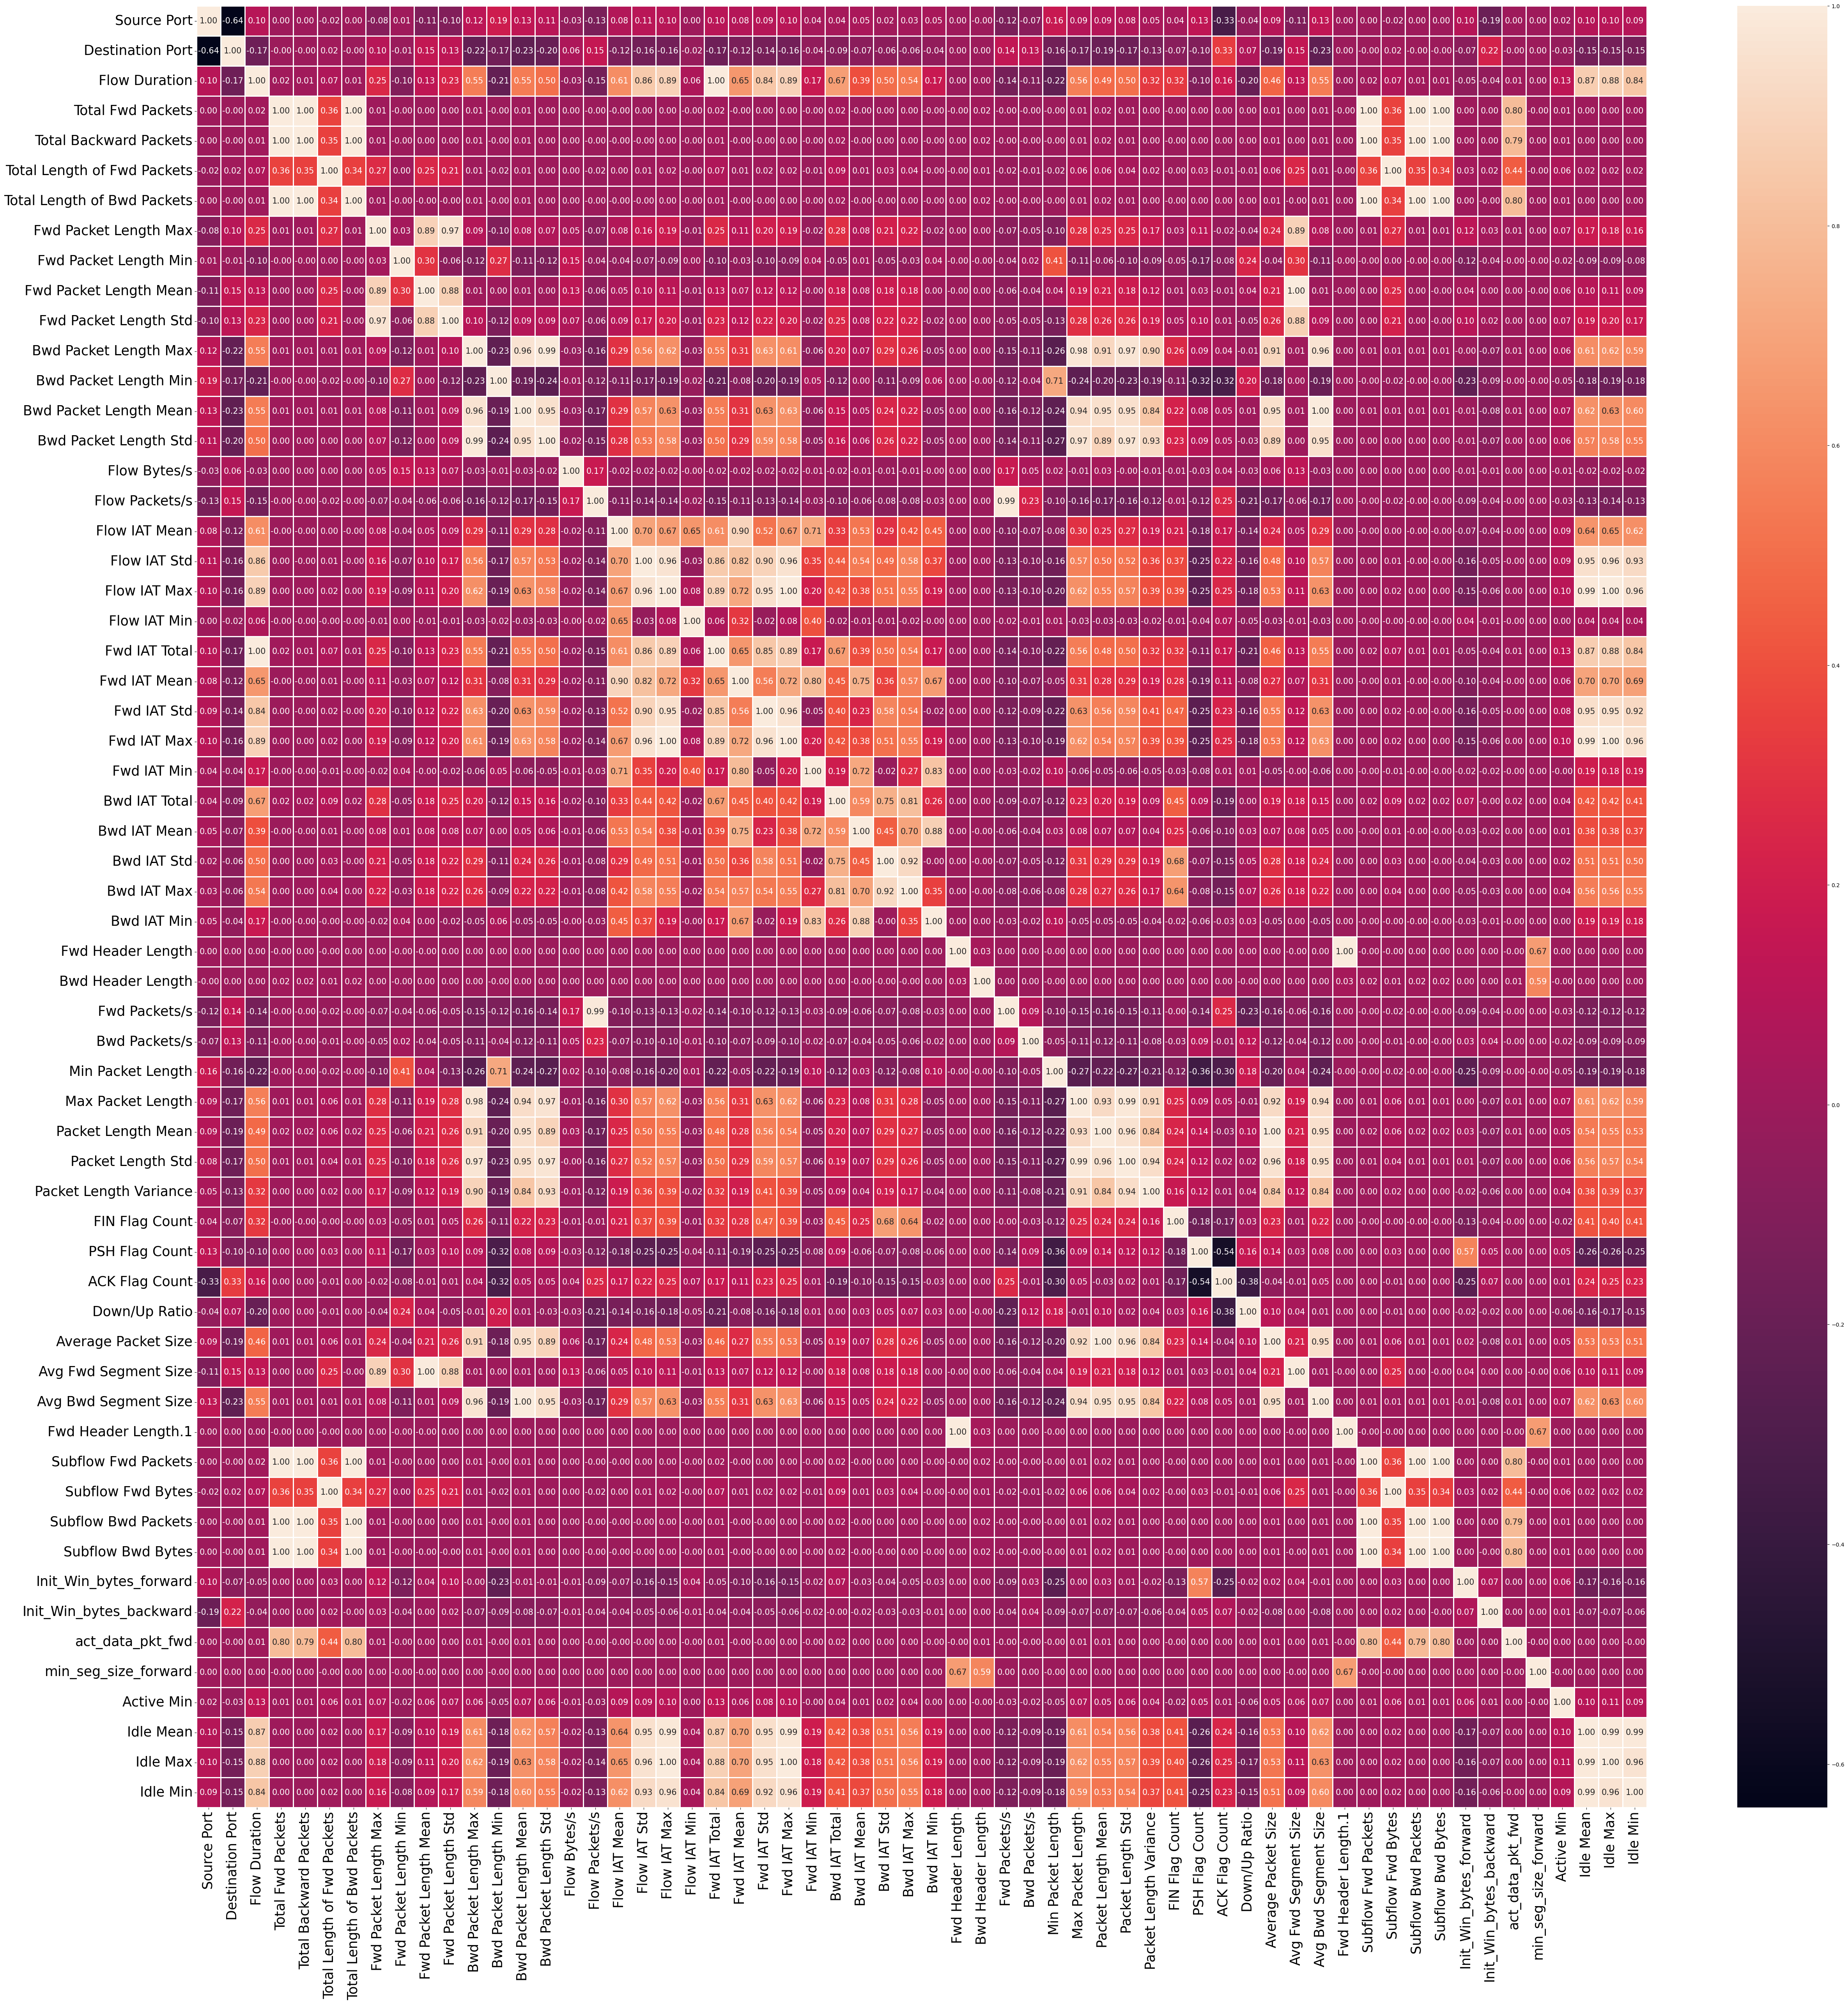

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# (Optional) Assign data_balanced to all_datav2 for consistency
all_datav2 = data_balanced

# Compute the correlation matrix for all numeric features only
numeric_cols = all_datav2.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

# Plot the correlation heatmap
plt.gcf().set_size_inches(60, 60)
hm = sns.heatmap(correlation_matrix, annot=True, linewidths=.8, annot_kws={"fontsize": 15}, fmt=".2f")
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize=25)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize=25)
plt.savefig("corr_heatmap.png", dpi=200, format='png', bbox_inches="tight", pad_inches=0.4)
plt.show()

In [26]:
all_data_corr_mtrx = correlation_matrix
all_data_corr_mtrx

Source Port  Destination Port  Flow Duration  \
Source Port                     1.000000         -0.639546       0.103076   
Destination Port               -0.639546          1.000000      -0.174416   
Flow Duration                   0.103076         -0.174416       1.000000   
Total Fwd Packets               0.002195         -0.003720       0.016537   
Total Backward Packets          0.002249         -0.003280       0.014902   
Total Length of Fwd Packets    -0.015456          0.017907       0.066563   
Total Length of Bwd Packets     0.001945         -0.002708       0.012680   
Fwd Packet Length Max          -0.083645          0.101805       0.254443   
Fwd Packet Length Min           0.010764         -0.010505      -0.101089   
Fwd Packet Length Mean         -0.108867          0.146706       0.130817   
Fwd Packet Length Std          -0.100176          0.125784       0.233890   
Bwd Packet Length Max           0.116280         -0.216076       0.552391   
Bwd Packet Length Min           0.192757         -0.165554      -0.213149   
Bwd Packet Length Mean          0.132836         -0.233508       0.549096   
Bwd Packet Length Std           0.106756         -0.202596       0.504853   
Flow Bytes/s                   -0.032317          0.061420      -0.025339   
Flow Packets/s                 -0.130072          0.154157      -0.152067   
Flow IAT Mean                   0.077995         -0.124576       0.614350   
Flow IAT Std                    0.105200         -0.155978       0.855314   
Flow IAT Max                    0.103350         -0.156007       0.885573   
Flow IAT Min                    0.003780         -0.020362       0.060514   
Fwd IAT Total                   0.103702         -0.173940       0.999151   
Fwd IAT Mean                    0.084815         -0.122460       0.650039   
Fwd IAT Std                     0.091987         -0.144974       0.843485   
Fwd IAT Max                     0.103744         -0.155341       0.885385   
Fwd IAT Min                     0.036979         -0.040546       0.167060   
Bwd IAT Total                   0.039201         -0.093493       0.674354   
Bwd IAT Mean                    0.051363         -0.066001       0.391865   
Bwd IAT Std                     0.019945         -0.057165       0.497607   
Bwd IAT Max                     0.032144         -0.064899       0.537985   
Bwd IAT Min                     0.045125         -0.039051       0.168955   
Fwd Header Length               0.002268          0.000414       0.000468   
Bwd Header Length              -0.000292          0.000393       0.000324   
Fwd Packets/s                  -0.123410          0.139341      -0.140373   
Bwd Packets/s                  -0.067723          0.128136      -0.105765   
Min Packet Length               0.161724         -0.160110      -0.223677   
Max Packet Length               0.086209         -0.174190       0.561032   
Packet Length Mean              0.089894         -0.189901       0.486206   
Packet Length Std               0.080569         -0.172592       0.504709   
Packet Length Variance          0.049917         -0.127097       0.320759   
FIN Flag Count                  0.035680         -0.069607       0.317982   
PSH Flag Count                  0.132225         -0.102856      -0.103945   
ACK Flag Count                 -0.330397          0.332704       0.164975   
Down/Up Ratio                  -0.037407          0.072077      -0.199618   
Average Packet Size             0.090600         -0.189101       0.464964   
Avg Fwd Segment Size           -0.108867          0.146706       0.130817   
Avg Bwd Segment Size            0.132836         -0.233508       0.549096   
Fwd Header Length.1             0.002268          0.000414       0.000468   
Subflow Fwd Packets             0.002195         -0.003720       0.016537   
Subflow Fwd Bytes              -0.015456          0.017907       0.066563   
Subflow Bwd Packets             0.002249         -0.003280       0.014902   
Subflow Bwd Bytes        

In [27]:
# Define a function to sort the absolute values of the correlation matrix
def sort_correlations(matrix):
    # Unstack the matrix to get pairs, take absolute values
    corr_unstacked = matrix.unstack().abs()
    # Sort the pairs by correlation value (descending)
    corr_sorted = corr_unstacked.sort_values(ascending=False)
    return corr_sorted

# Get the sorted correlations
sorted_correlations = sort_correlations(all_data_corr_mtrx)

# Display the sorted correlations
sorted_correlations

Bwd IAT Total          Bwd IAT Total                  1.000000
Destination Port       Destination Port               1.000000
PSH Flag Count         PSH Flag Count                 1.000000
Fwd Packet Length Min  Fwd Packet Length Min          1.000000
Fwd Packet Length Max  Fwd Packet Length Max          1.000000
                                                        ...   
min_seg_size_forward   Total Length of Bwd Packets    0.000012
Subflow Bwd Bytes      min_seg_size_forward           0.000012
min_seg_size_forward   Subflow Bwd Bytes              0.000012
Bwd IAT Mean           act_data_pkt_fwd               0.000008
act_data_pkt_fwd       Bwd IAT Mean                   0.000008
Length: 3600, dtype: float64

In [30]:
from collections import OrderedDict

def remove_highly_correlated_features(
    df, 
    importances, 
    threshold=0.95, 
    verbose=True
):
    """
    Iteratively remove the least important feature from each highly correlated pair.
    Args:
        df: DataFrame with only numeric features.
        importances: DataFrame with feature importances (index: feature names, column: 'importance').
        threshold: Correlation threshold above which features are considered highly correlated.
        verbose: If True, print progress.
    Returns:
        features_to_delete: List of features removed.
        reduced_df: DataFrame with highly correlated features removed.
    """
    def add_to_dict(d, ft, ft2):
        try:
            d[ft].append(ft2)
        except KeyError:
            d[ft] = [ft2]

    get_importance = lambda feat: importances.loc[feat][0] if isinstance(importances.loc[feat], pd.Series) else importances.loc[feat]
    sort_key = lambda elem: get_importance(elem[0])

    def what_to_delete(sorted_dict):
        to_delete = []
        for k, val in sorted_dict.items():
            # Get all features with lower importance than k
            feats_lower_imp = importances[importances.index.slice_indexer(k)].index
            if set(val) - set(feats_lower_imp):
                if k not in to_delete:
                    to_delete.append(k)
            else:
                for ft in feats_lower_imp[::-1]:
                    if ft in val and ft not in to_delete:
                        to_delete.append(ft)
                        break
        return to_delete

    features_deleted = []
    corr_matrix = df.corr().copy()
    epoch = 0

    while True:
        highly_corr = {}
        count = 0
        # Sort correlations
        corr_sorted = corr_matrix.unstack().abs().sort_values(ascending=False)
        for feats, val in corr_sorted.items():
            if val > threshold and feats[0] != feats[1]:
                count += 1
                add_to_dict(highly_corr, feats[0], feats[1])
        if not highly_corr:
            break
        highly_corr_sorted = OrderedDict(sorted(highly_corr.items(), key=sort_key))
        to_delete = what_to_delete(highly_corr_sorted)
        features_deleted += to_delete
        epoch += 1
        if verbose:
            print(f"There are {count} highly correlated pairs in iteration {epoch}")
        corr_matrix.drop(to_delete, axis=1, inplace=True)
        corr_matrix.drop(to_delete, axis=0, inplace=True)

    if verbose:
        print(f"Deleting {len(features_deleted)} features due to high correlation.")
        print("Features deleted:\n" + "\n".join(features_deleted))
    reduced_df = df.drop(columns=features_deleted)
    return features_deleted, reduced_df

# Example usage:
# numeric_features = data_balanced.select_dtypes(include=[np.number])
# features_deleted, reduced_features = remove_highly_correlated_features(numeric_features, importances)

# Example: get only numeric features from your processed DataFrame
numeric_features = data_balanced.select_dtypes(include=[np.number])

# Call the function with your numeric features and importances DataFrame
features_deleted, reduced_features = remove_highly_correlated_features(numeric_features, importances)

# Now you can check the output
print("Deleted features:", features_deleted)
print("Reduced features shape:", reduced_features.shape)

There are 112 highly correlated pairs in iteration 1
Deleting 23 features due to high correlation.
Features deleted:
Idle Mean
Subflow Bwd Packets
Idle Max
Fwd IAT Total
Flow IAT Std
Idle Min
Total Backward Packets
Fwd Packets/s
Fwd Header Length
Fwd IAT Std
Fwd Packet Length Std
Subflow Fwd Packets
Fwd IAT Max
Total Fwd Packets
Packet Length Std
Avg Fwd Segment Size
Max Packet Length
Total Length of Bwd Packets
Packet Length Mean
Bwd Packet Length Max
Bwd Packet Length Std
Bwd Packet Length Mean
Subflow Fwd Bytes
Deleted features: ['Idle Mean', 'Subflow Bwd Packets', 'Idle Max', 'Fwd IAT Total', 'Flow IAT Std', 'Idle Min', 'Total Backward Packets', 'Fwd Packets/s', 'Fwd Header Length', 'Fwd IAT Std', 'Fwd Packet Length Std', 'Subflow Fwd Packets', 'Fwd IAT Max', 'Total Fwd Packets', 'Packet Length Std', 'Avg Fwd Segment Size', 'Max Packet Length', 'Total Length of Bwd Packets', 'Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Std', 'Bwd Packet Length Mean', 'Subflow F

C:\Users\nishant lap\AppData\Local\Temp\ipykernel_440\133266054.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  get_importance = lambda feat: importances.loc[feat][0] if isinstance(importances.loc[feat], pd.Series) else importances.loc[feat]


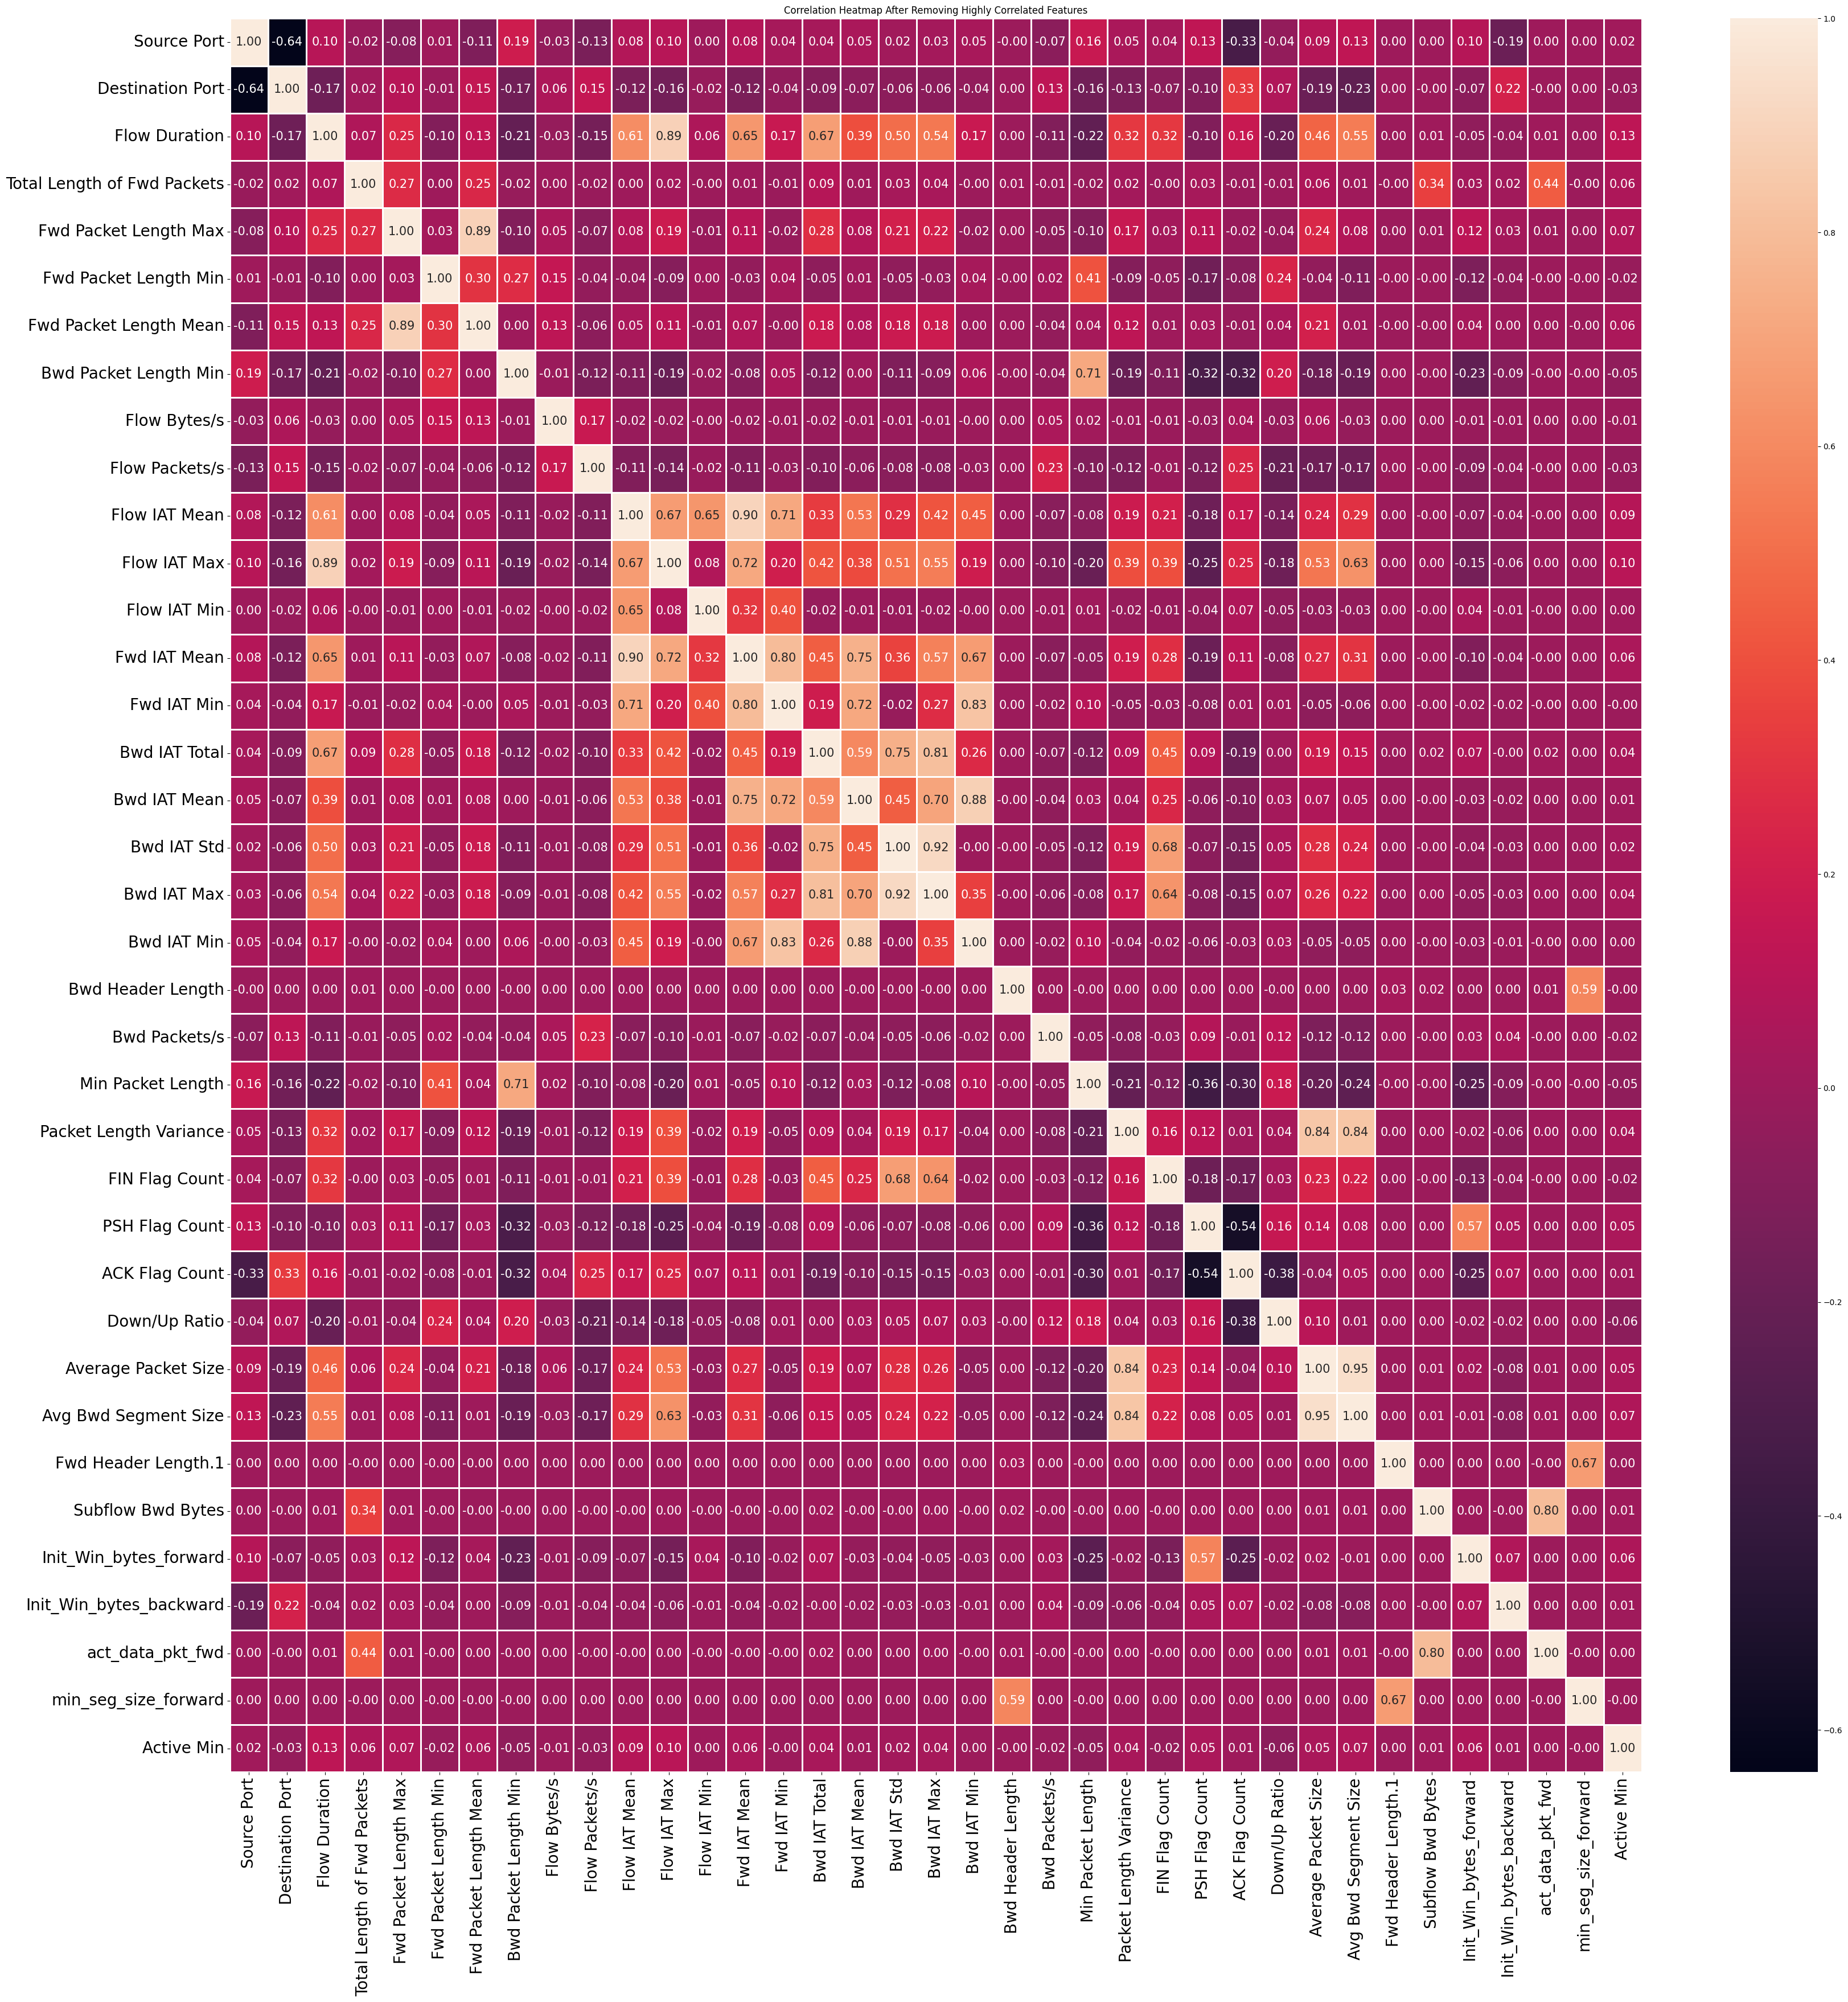

In [31]:
# Compute the new correlation matrix after removing highly correlated features
reduced_corr_matrix = reduced_features.corr()

# Plot the new correlation heatmap
plt.gcf().set_size_inches(40, 40)
hm2 = sns.heatmap(reduced_corr_matrix, annot=True, linewidths=.8, annot_kws={"fontsize": 15}, fmt=".2f")
hm2.set_yticklabels(hm2.get_ymajorticklabels(), fontsize=20)
hm2.set_xticklabels(hm2.get_xmajorticklabels(), fontsize=20)
plt.title("Correlation Heatmap After Removing Highly Correlated Features")
plt.savefig("corr_heatmap2.png", dpi=200, format='png', bbox_inches="tight", pad_inches=0.4)
plt.show()

In [33]:
# Create a new DataFrame after dropping highly correlated features
all_datav3 = all_datav2.copy()  # Make a copy for safe editing

# Drop the features that were identified as highly correlated
all_datav3.drop(features_deleted, axis=1, inplace=True)

# (Optional) Make another copy for backup or further processing
all_datav3_cp = all_datav3.copy()

# Display the resulting DataFrame to check validity
all_datav3

Flow ID      Source IP  \
18871          172.16.0.1-192.168.10.50-49650-80-6     172.16.0.1   
18872          172.16.0.1-192.168.10.50-49650-80-6     172.16.0.1   
18873          172.16.0.1-192.168.10.50-51684-80-6     172.16.0.1   
18874          172.16.0.1-192.168.10.50-51684-80-6     172.16.0.1   
18875          172.16.0.1-192.168.10.50-51686-80-6     172.16.0.1   
...                                            ...            ...   
292377        192.168.10.8-74.119.118.67-7075-80-6  74.119.118.67   
2417103    192.168.10.51-23.208.31.225-59122-443-6  192.168.10.51   
724700   192.168.10.12-125.212.216.123-55618-443-6  192.168.10.12   
686692     178.172.160.2-192.168.10.16-443-48770-6  192.168.10.16   
2434404      192.168.10.3-192.168.10.8-53-60261-17   192.168.10.8   

         Source Port   Destination IP  Destination Port            Timestamp  \
18871          49650    192.168.10.50                80        7/7/2017 3:56   
18872          49650    192.168.10.50                80        7/7/2017 3:56   
18873          51684    192.168.10.50                80        7/7/2017 3:56   
18874          51684    192.168.10.50                80        7/7/2017 3:56   
18875          51686    192.168.10.50                80        7/7/2017 3:56   
...              ...              ...               ...                  ...   
292377            80     192.168.10.8              7075        7/7/2017 2:25   
2417103        59122    23.208.31.225               443        5/7/2017 3:10   
724700         55618  125.212.216.123               443  03/07/2017 09:43:15   
686692         48770    178.172.160.2               443       7/7/2017 11:58   
2434404        60261     192.168.10.3                53        5/7/2017 2:31   

         Flow Duration  Total Length of Fwd Packets  Fwd Packet Length Max  \
18871          1293792                         26.0                   20.0   
18872          4421382                         24.0                    6.0   
18873          1083538                         26.0                   20.0   
18874         80034360                         56.0                   20.0   
18875           642654                         26.0                   20.0   
...                ...                          ...                    ...   
292377               4                         12.0                    6.0   
2417103      116524885                       5601.0                 1656.0   
724700            4442                          0.0                    0.0   
686692           66681                          0.0                    0.0   
2434404            437                         88.0                   44.0   

         Fwd Packet Length Min  ...  Avg Bwd Segment Size  \
18871                      0.0  ...           1658.142857   
18872                      6.0  ...              0.000000   
18873                      0.0  ...           1933.500000   
18874                      0.0  ...           2900.250000   
18875                      0.0  ...           1934.500000   
...                        ...  ...                   ...   
292377                     6.0  ...              0.000000   
2417103                    0.0  ...            837.864865   
724700                     0.0  ...              0.000000   
686692                     0.0  ...              0.000000   
2434404                   44.0  ...            331.000000   

         Fwd Header Length.1  Subflow Bwd Bytes  Init_Win_bytes_forward  \
18871                     72              11607                    8192   
18872                     80                  0                     256   
18873                     72              11601                    8192   
18874                    172              11601                     256   
18875                     72              11607                    8192   
...                      ...                ...                     ...   
292377                    40                  0           

In [38]:
print(all_datav3.columns.tolist())

['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Timestamp', 'Flow Duration', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd Header Length', 'Bwd Packets/s', 'Min Packet Length', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Min', 'Label', 'traffic_type']


In [41]:
from sklearn.preprocessing import QuantileTransformer
import pandas as pd

# Save the categorical columns before dropping
labels = all_datav3["Label"].copy()
traffic_type = all_datav3["traffic_type"].copy()

# Select only numeric columns for scaling
all_datav3_numeric = all_datav3.select_dtypes(include=[np.number])

# Initialize the QuantileTransformer
qt = QuantileTransformer(random_state=10)

# Fit and transform only the numeric data
all_data_scaled = qt.fit_transform(all_datav3_numeric)

# Convert the scaled data back to a DataFrame for easier handling
all_data_scaled_df = pd.DataFrame(all_data_scaled, columns=all_datav3_numeric.columns, index=all_datav3.index)

# Add back the categorical columns
all_data_scaled_df["Label"] = labels
all_data_scaled_df["traffic_type"] = traffic_type

# Check the scaled data
all_data_scaled_df.head()

Source Port  Destination Port  Flow Duration  \
18871     0.489531          0.423423       0.668991   
18872     0.489531          0.423423       0.706382   
18873     0.559914          0.423423       0.660926   
18874     0.559914          0.423423       0.829741   
18875     0.559994          0.423423       0.644297   

       Total Length of Fwd Packets  Fwd Packet Length Max  \
18871                     0.413413               0.437437   
18872                     0.377377               0.346346   
18873                     0.413413               0.437437   
18874                     0.534535               0.437437   
18875                     0.413413               0.437437   

       Fwd Packet Length Min  Fwd Packet Length Mean  Bwd Packet Length Min  \
18871               0.000000                0.445946                    0.0   
18872               0.712713                0.351852                    0.0   
18873               0.000000                0.445946                    0.0   
18874               0.000000                0.410911                    0.0   
18875               0.000000                0.445946                    0.0   

       Flow Bytes/s  Flow Packets/s  ...  Avg Bwd Segment Size  \
18871      0.588341        0.338383  ...              0.837031   
18872      0.178463        0.242648  ...              0.000000   
18873      0.605426        0.341245  ...              0.910911   
18874      0.379308        0.098503  ...              0.987487   
18875      0.638969        0.359876  ...              0.921421   

       Fwd Header Length.1  Subflow Bwd Bytes  Init_Win_bytes_forward  \
18871             0.585586           0.959459                0.760761   
18872             0.635135           0.000000                0.468969   
18873             0.585586           0.925926                0.760761   
18874             0.789790           0.925926                0.468969   
18875             0.585586           0.959459                0.760761   

       Init_Win_bytes_backward  act_data_pkt_fwd  min_seg_size_forward  \
18871                 0.671171          0.719720              0.223724   
18872                 0.000000          0.815816              0.223724   
18873                 0.671171          0.719720              0.223724   
18874                 0.671171          0.923423              0.223724   
18875                 0.671171          0.719720              0.223724   

       Active Min  Label  traffic_type  
18871     0.00000   DDoS        Attack  
18872     0.00000   DDoS        Attack  
18873     0.00000   DDoS        Attack  
18874     0.79039   DDoS        Attack  
18875     0.00000   DDoS        Attack  

[5 rows x 39 columns]

In [42]:
from sklearn.model_selection import train_test_split

# Use the scaled DataFrame and the label column for splitting
X = all_data_scaled_df.drop(columns=["Label", "traffic_type"])
y = all_data_scaled_df["Label"]

# Split into training and test sets (70% train, 30% test)
train_data, test_data, train_lbl, test_lbl = train_test_split(
    X, y, random_state=10, train_size=0.7, stratify=y
)

# Further split the training set into neural net training and validation sets (80% train, 20% validation)
neural_train_data, neural_validation, neural_train_lbl, neural_validation_lbl = train_test_split(
    train_data, train_lbl, random_state=10, train_size=0.8, stratify=train_lbl
)

# Create binary traffic type labels for each split
train_bin_trff_lbl = train_lbl.map(lambda lbl: "Normalny" if lbl == "BENIGN" else "Atak")
neural_train_bin_trff_lbl = neural_train_lbl.map(lambda lbl: "Normalny" if lbl == "BENIGN" else "Atak")
test_bin_trff_lbl = test_lbl.map(lambda lbl: "Normalny" if lbl == "BENIGN" else "Atak")
neural_validation_bin_trff_lbl = neural_validation_lbl.map(lambda lbl: "Normalny" if lbl == "BENIGN" else "Atak")

Label
BENIGN              456545
DoS Hulk            161087
PortScan            111163
DDoS                 89617
DoS GoldenEye         7205
FTP-Patator           5555
SSH-Patator           4128
DoS slowloris         4057
DoS Slowhttptest      3849
Bot                   1369
Infiltration            25
Heartbleed               8
Name: count, dtype: int64
Total: 844608


C:\Users\nishant lap\AppData\Local\Temp\ipykernel_440\1734492342.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_counts.index, y=traffic_counts.values, palette="viridis")


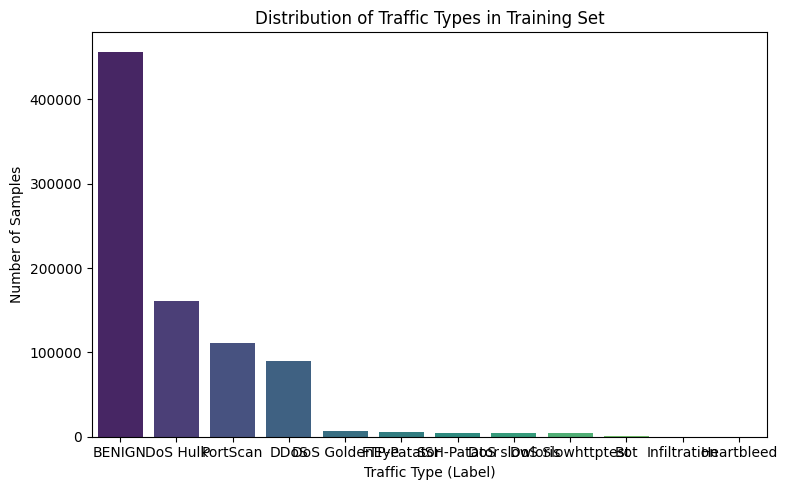

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of each traffic type in the training set
traffic_counts = train_lbl.value_counts()
total_samples = traffic_counts.sum()
print(traffic_counts)
print("Total:", total_samples)

# Plot the distribution for the training set
plt.figure(figsize=(8, 5))
sns.barplot(x=traffic_counts.index, y=traffic_counts.values, palette="viridis")
plt.title("Distribution of Traffic Types in Training Set")
plt.xlabel("Traffic Type (Label)")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

C:\Users\nishant lap\AppData\Local\Temp\ipykernel_440\2555733431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=train_lbl, order=order, palette=palette)


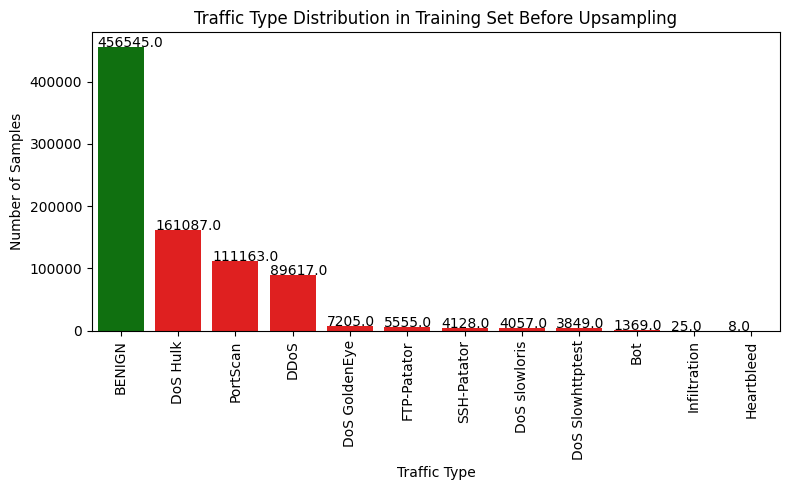

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the order of labels and set up the color palette
order = train_lbl.value_counts().index
palette = {key: "g" if key == "BENIGN" else "r" for key in order}

# Plot the countplot with custom palette
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=train_lbl, order=order, palette=palette)
plt.xticks(rotation="vertical")

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.title("Traffic Type Distribution in Training Set Before Upsampling")
plt.xlabel("Traffic Type")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.savefig("distribution_up1.png", dpi=200, format='png', bbox_inches="tight")
plt.show()

## OUTLIER DETECTION(Z-SCORE)

##### Z-SCORE IS 3 HERE
###### BCZ ITS NORMALLY DISTRIBUTED TABLE

In [46]:

# Assume train_data is your features DataFrame and train_lbl is your label Series

z_thresh = 3

# Calculate Z-scores for all numeric columns
z_scores = np.abs((train_data - train_data.mean()) / train_data.std())

# Keep only rows where all features are within the threshold
mask = (z_scores < z_thresh).all(axis=1)
train_data_no_outliers = train_data[mask]
train_lbl_no_outliers = train_lbl[mask]

print(f"Original training samples: {train_data.shape[0]}")
print(f"Samples after outlier removal: {train_data_no_outliers.shape[0]}")

Original training samples: 844608
Samples after outlier removal: 794953


In [48]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer

# 1. Identify categorical columns (object or category dtype)
categorical_cols = train_data_no_outliers.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. One-hot encode categorical columns (if any)
if categorical_cols:
    train_data_encoded = pd.get_dummies(train_data_no_outliers, columns=categorical_cols, drop_first=True)
else:
    train_data_encoded = train_data_no_outliers.copy()

# 3. Normalize all features using QuantileTransformer
scaler = QuantileTransformer(random_state=10)
train_data_normalized = scaler.fit_transform(train_data_encoded)

# 4. Convert back to DataFrame for easier handling
train_data_final = pd.DataFrame(train_data_normalized, columns=train_data_encoded.columns, index=train_data_encoded.index)

# 5. Your labels remain unchanged
train_lbl_final = train_lbl_no_outliers.copy()

# 6. Combine features and label into a single DataFrame for saving
train_data_final["Label"] = train_lbl_final

# 7. Save the processed training set back to the original file (replace with your actual file path)
original_file_path = r"N:\DATASET\cic-2017\train_data_processed.csv"
train_data_final.to_csv(original_file_path, index=False, encoding='utf-8')

print(f"Processed training data saved to: {original_file_path}")

Processed training data saved to: N:\DATASET\cic-2017\train_data_processed.csv


In [49]:
train_data_final["Label"].value_counts().loc["BENIGN"]

np.int64(448044)

In [51]:
from imblearn.over_sampling import SMOTE
from math import ceil
import numpy as np

# Use the processed training data (excluding the label column)
X_train = train_data_final.drop(columns=["Label"])
y_train = train_data_final["Label"]

# Calculate the original class distribution
a = y_train.value_counts()
all_samples = a.sum()

min_thresh = 0.005  # Minimum percent threshold for each class after oversampling

def over_sample_new(y):
    cls_distr = {}
    for trf_cls in np.unique(y):
        curr_size = a.loc[trf_cls]
        if (curr_size / all_samples) < min_thresh:
            cls_distr[trf_cls] = ceil(min_thresh * all_samples)
        else:
            cls_distr[trf_cls] = curr_size
    print("Class distribution after oversampling:")
    print(cls_distr)
    return cls_distr
# Initialize SMOTE with custom sampling strategy (without n_jobs)
smote = SMOTE(random_state=10, k_neighbors=3, sampling_strategy=over_sample_new)

# Fit and resample
up_train_data, up_train_lbl = smote.fit_resample(X_train, y_train)

# Check new class distribution
print(pd.Series(up_train_lbl).value_counts())

Class distribution after oversampling:
{'BENIGN': np.int64(448044), 'Bot': 3975, 'DDoS': np.int64(89597), 'DoS GoldenEye': np.int64(7205), 'DoS Hulk': np.int64(119953), 'DoS Slowhttptest': 3975, 'DoS slowloris': np.int64(4057), 'FTP-Patator': np.int64(5555), 'Heartbleed': 3975, 'Infiltration': 3975, 'PortScan': np.int64(111163), 'SSH-Patator': np.int64(4128)}
Label
BENIGN              448044
DoS Hulk            119953
PortScan            111163
DDoS                 89597
DoS GoldenEye         7205
FTP-Patator           5555
SSH-Patator           4128
DoS slowloris         4057
DoS Slowhttptest      3975
Bot                   3975
Infiltration          3975
Heartbleed            3975
Name: count, dtype: int64


In [52]:
from imblearn.over_sampling import SMOTE
from math import ceil
import numpy as np

neural_thresh = 0.005  # Minimum percent threshold for each class after oversampling

neural_glob_cls_distr = None

def over_sample_neural(y):
    all_samples = neural_train_lbl.value_counts().sum()
    global neural_glob_cls_distr
    cls_distr = {}
    for trf_cls in np.unique(y):
        curr_size = neural_train_lbl.value_counts().loc[trf_cls]
        if (curr_size / all_samples) < neural_thresh:
            cls_distr[trf_cls] = ceil(neural_thresh * all_samples)
        else:
            cls_distr[trf_cls] = curr_size
    print("Class distribution after oversampling for neural nets:")
    neural_glob_cls_distr = cls_distr
    print(neural_glob_cls_distr)
    return cls_distr

# Initialize SMOTE for neural nets (without n_jobs)
neural_smote = SMOTE(random_state=10, k_neighbors=2, sampling_strategy=over_sample_neural)

# Fit and resample
up_neural_train_data, up_neural_train_lbl = neural_smote.fit_resample(neural_train_data, neural_train_lbl)

# Check new class distribution
print(pd.Series(up_neural_train_lbl).value_counts())

Class distribution after oversampling for neural nets:
{'BENIGN': np.int64(365236), 'Bot': 3379, 'DDoS': np.int64(71694), 'DoS GoldenEye': np.int64(5764), 'DoS Hulk': np.int64(128870), 'DoS Slowhttptest': 3379, 'DoS slowloris': 3379, 'FTP-Patator': np.int64(4444), 'Heartbleed': 3379, 'Infiltration': 3379, 'PortScan': np.int64(88930), 'SSH-Patator': 3379}
Label
BENIGN              365236
DoS Hulk            128870
PortScan             88930
DDoS                 71694
DoS GoldenEye         5764
FTP-Patator           4444
Bot                   3379
DoS Slowhttptest      3379
DoS slowloris         3379
SSH-Patator           3379
Infiltration          3379
Heartbleed            3379
Name: count, dtype: int64


In [62]:
from math import ceil
import numpy as np

min_thresh = 0.005  # Minimum percent threshold for each class after oversampling

glob_cls_distr = None

def over_sample_new(y):
    global glob_cls_distr
    cls_distr = {}
    a = pd.Series(y).value_counts()
    all_samples = a.sum()
    for trf_cls in np.unique(y):
        curr_size = a.loc[trf_cls]
        if (curr_size / all_samples) < min_thresh:
            cls_distr[trf_cls] = ceil(min_thresh * all_samples)
        else:
            cls_distr[trf_cls] = curr_size
    print("Class distribution after oversampling:")
    glob_cls_distr = cls_distr
    print(glob_cls_distr)
    return cls_distr

def over_sample_bin(dct):
    sm = 0
    for key, val in dct.items():
        if key != "BENIGN":
            sm += val
        else:
            benign = val
    return {"Normalny": benign, "Atak": sm}

# First, call over_sample_new to set glob_cls_distr using your label series (e.g., train_lbl_final)
over_sample_new(train_lbl_final)  # or use train_lbl_no_outliers if that's your filtered label set

# Now glob_cls_distr is set!
ratio = over_sample_bin(glob_cls_distr)
print("Binary class ratio for SMOTE:", ratio)

smote_bin = SMOTE(random_state=10, k_neighbors=3, sampling_strategy=ratio)
up_train_bin_data, up_train_bin_trff_lbl = smote_bin.fit_resample(train_data_no_outliers, train_lbl_no_outliers.map(lambda lbl: "Normalny" if lbl == "BENIGN" else "Atak"))

print("New binary class distribution after SMOTE:")
print(pd.Series(up_train_bin_trff_lbl).value_counts())

Class distribution after oversampling:
{'BENIGN': np.int64(448044), 'Bot': 3975, 'DDoS': np.int64(89597), 'DoS GoldenEye': np.int64(7205), 'DoS Hulk': np.int64(119953), 'DoS Slowhttptest': 3975, 'DoS slowloris': np.int64(4057), 'FTP-Patator': np.int64(5555), 'Heartbleed': 3975, 'Infiltration': 3975, 'PortScan': np.int64(111163), 'SSH-Patator': np.int64(4128)}
Binary class ratio for SMOTE: {'Normalny': np.int64(448044), 'Atak': np.int64(357558)}
New binary class distribution after SMOTE:
Label
Normalny    448044
Atak        357558
Name: count, dtype: int64


C:\Users\nishant lap\AppData\Local\Temp\ipykernel_440\3242468777.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=up_train_lbl, order=order, palette=palette)


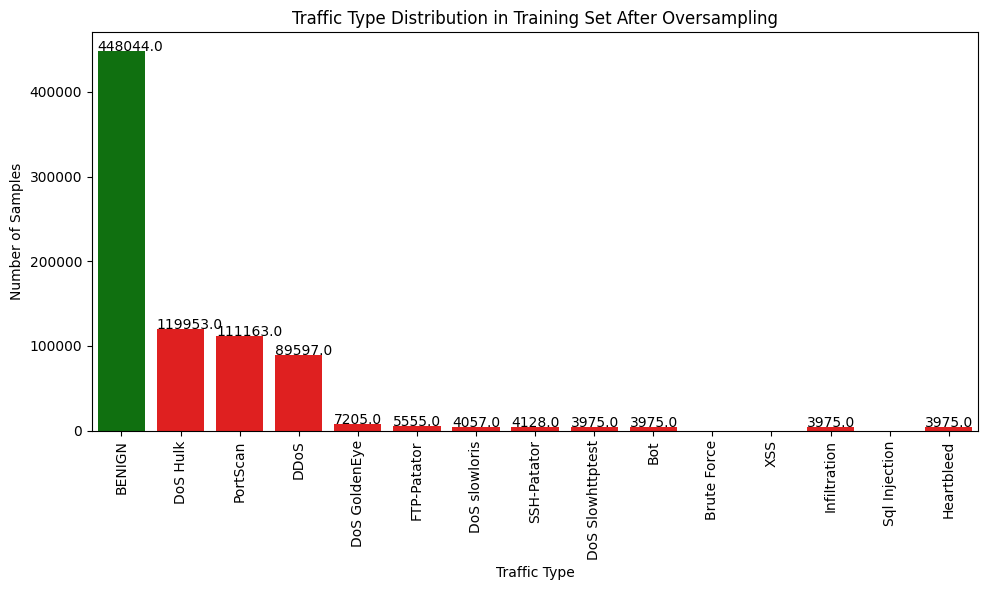

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order of traffic types and the color palette
order = [
    'BENIGN', 'DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye',
    'FTP-Patator', 'DoS slowloris', 'SSH-Patator', 'DoS Slowhttptest',
    'Bot', 'Brute Force', 'XSS', 'Infiltration', 'Sql Injection',
    'Heartbleed'
]
palette = {key: "g" if key == "BENIGN" else "r" for key in order}

# Plot the countplot with English labels
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=up_train_lbl, order=order, palette=palette)
plt.xticks(rotation="vertical")

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.title("Traffic Type Distribution in Training Set After Oversampling")
plt.xlabel("Traffic Type")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.savefig("distribution_up2.png", dpi=200, format='png', bbox_inches="tight")
plt.show()

## ONE-HOT-ENCODING

In [65]:
from sklearn.preprocessing import OneHotEncoder

# Reshape label arrays for OneHotEncoder
test_rshaped = test_lbl.values.reshape(-1, 1)
train_rshaped = train_lbl.values.reshape(-1, 1)
up_train_rshaped = up_train_lbl.values.reshape(-1, 1)
up_neural_train_rshaped = up_neural_train_lbl.values.reshape(-1, 1)
neural_validation_rshaped = neural_validation_lbl.values.reshape(-1, 1)

# Fit the OneHotEncoder on ALL possible classes to ensure consistent encoding
all_classes = [
    'BENIGN', 'DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye',
    'FTP-Patator', 'DoS slowloris', 'SSH-Patator', 'DoS Slowhttptest',
    'Bot', 'Brute Force', 'XSS', 'Infiltration', 'Sql Injection',
    'Heartbleed'
]
ohenc = OneHotEncoder(categories=[all_classes], sparse_output=False, handle_unknown='ignore')

# Fit encoder on the union of all labels (or just on train set, if you prefer)
ohenc.fit(train_rshaped)

# Transform each label set
test_lbl_enc = ohenc.transform(test_rshaped)
train_lbl_enc = ohenc.transform(train_rshaped)
up_train_lbl_enc = ohenc.transform(up_train_rshaped)
up_neural_train_lbl_enc = ohenc.transform(up_neural_train_rshaped)
neural_validation_lbl_enc = ohenc.transform(neural_validation_rshaped)

# Optionally, get the column names for the one-hot encoded labels
onehot_label_columns = ohenc.get_feature_names_out(['Label'])

# Example: convert to DataFrame if needed
import pandas as pd
train_lbl_enc_df = pd.DataFrame(train_lbl_enc, columns=onehot_label_columns)

In [73]:
from sklearn.preprocessing import LabelEncoder

# Create binary labels for upsampled neural net training set
up_neural_train_bin_trff_lbl = up_neural_train_lbl.map(lambda lbl: "Normalny" if lbl == "BENIGN" else "Atak")

lenc = LabelEncoder()
train_bin_trff_lbll_enc = lenc.fit_transform(train_bin_trff_lbl)
up_train_bin_trff_lbl_enc = lenc.transform(up_train_bin_trff_lbl)
up_neural_train_bin_trff_lbl_enc = lenc.transform(up_neural_train_bin_trff_lbl)
test_bin_trff_lbll_enc = lenc.transform(test_bin_trff_lbl)
neural_validation_bin_trff_lbl_enc = lenc.transform(neural_validation_bin_trff_lbl)

In [ ]:
import pandas as pd

# Save feature sets
pd.DataFrame(train_data).to_csv("train_set_df.csv", index=False)  # raw train set
pd.DataFrame(up_train_data).to_csv("upsmpl_train_set_df.csv", index=False)  # upsampled train set for multi-output classification
pd.DataFrame(up_neural_train_data).to_csv("upsmpl_neural_train_set_df.csv", index=False)  # upsampled train set for neural nets
pd.DataFrame(up_train_bin_data).to_csv("upsmpl_train_bin_set_df.csv", index=False)  # upsampled train set for binary classification
# pd.DataFrame(up_neural_train_bin_data).to_csv("upsmpl_neural_train_bin_set_df.csv", index=False)  # upsampled train set for binary classification for neural nets
pd.DataFrame(test_data).to_csv("test_set_df.csv", index=False)  # raw test set

# Save raw label Series (ensure they are Series, not DataFrames)
train_lbl.to_csv("train_lbl.csv", index=False, header=True)
up_train_lbl.to_csv("upsmpl_train_lbl.csv", index=False, header=True)
test_lbl.to_csv("test_lbl.csv", index=False, header=True)
train_bin_trff_lbl.to_csv("train_bin_trff_lbl.csv", index=False, header=True)
up_train_bin_trff_lbl.to_csv("upsmpl_train_bin_trff_lbl.csv", index=False, header=True)
test_bin_trff_lbl.to_csv("test_bin_trff_lbl.csv", index=False, header=True)

# Save one-hot encoded labels (with column names)
pd.DataFrame(train_lbl_enc, columns=onehot_label_columns).to_csv("train_lbl_enc.csv", index=False)
pd.DataFrame(up_train_lbl_enc, columns=onehot_label_columns).to_csv("upsmpl_train_lbl_enc.csv", index=False)
pd.DataFrame(up_neural_train_lbl_enc, columns=onehot_label_columns).to_csv("upsmpl_neural_train_lbl_enc.csv", index=False)
pd.DataFrame(test_lbl_enc, columns=onehot_label_columns).to_csv("test_lbl_enc.csv", index=False)
pd.DataFrame(neural_validation_lbl_enc, columns=onehot_label_columns).to_csv("neural_validation_lbl_enc.csv", index=False)

# Save label-encoded binary labels (if you have them)
pd.DataFrame(train_bin_trff_lbll_enc, columns=["Label"]).to_csv("train_bin_trff_lbl_enc.csv", index=False)
pd.DataFrame(up_train_bin_trff_lbl_enc, columns=["Label"]).to_csv("upsmpl_train_bin_trff_lbl_enc.csv", index=False)
pd.DataFrame(up_neural_train_bin_trff_lbl_enc, columns=["Label"]).to_csv("upsmpl_neural_train_bin_trff_lbl_enc.csv", index=False)
pd.DataFrame(test_bin_trff_lbll_enc, columns=["Label"]).to_csv("test_bin_trff_lbl_enc.csv", index=False)
pd.DataFrame(neural_validation_bin_trff_lbl_enc, columns=["Label"]).to_csv("neural_validation_bin_trff_lbl_enc.csv", index=False)

# Save neural validation set
pd.DataFrame(neural_validation).to_csv("neural_validation.csv", index=False)

In [76]:
import pandas as pd

# Combine features and label for the final training set
# (Assume train_data is your final features DataFrame and train_lbl is your final label Series)
final_train_df = pd.DataFrame(train_data)
final_train_df["Label"] = train_lbl.values  # Add label column

# Save the final training set
final_train_df.to_csv("final_train_set.csv", index=False)

# Combine features and label for the final test set
final_test_df = pd.DataFrame(test_data)
final_test_df["Label"] = test_lbl.values  # Add label column

# Save the final test set
final_test_df.to_csv("final_test_set.csv", index=False)

print("Final training and test datasets saved as 'final_train_set.csv' and 'final_test_set.csv'.")

Final training and test datasets saved as 'final_train_set.csv' and 'final_test_set.csv'.
